**DATA 620 ASSIGNMENT #4**


In [ ]:
%matplotlib inline


# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from prettytable import PrettyTable
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

#print("Biadjacency matrix")
#print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
#W = bipartite.projected_graph(G, women)
#print('')
#print("#Friends, Member")
#for w in women:
#    print('%d %s' % (W.degree(w), w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
#W = bipartite.weighted_projected_graph(G, women)
#print('')
#print("#Friend meetings, Member")
#for w in women:
#    print('%d %s' % (W.degree(w, weight='weight'), w))

#nx.draw(G)
#plt.show()

In [ ]:
#print("Biadjacency matrix")
#print(bipartite.biadjacency_matrix(G, women, clubs))

In [ ]:
#plot of the entire network graph
nx.draw(G)
plt.show()

**QUESTION**

WHAT CAN YOU INFER ABOUT THE RELATIONSHIPS BETWEEN (1) WOMEN, AND (2) THE SOCIAL EVENTS? PLEASE PROVIDE CODE AND ANALYSIS IN A JUPYTER NOTEBOOK STORED IN YOUR GITHUB REOSITORY.

**ABOUT THE NODES**

In [ ]:
top_nodes, bottom_nodes = nx.bipartite.sets(G)
women = list(top_nodes)
clubs = list(bottom_nodes)

print("\nThese are the 18 women in the graph:\n")
for woman in women:
    print(woman)

In [ ]:
clubs = list(clubs)

print("\nThese are the 14 clubs in the graph:\n")
for club in clubs:
    print(club)

In [116]:
#All nodes and their degrees(number of connections)
all_degrees = dict(nx.degree(G))

#women_degrees = G.degree(top_nodes)
#clubs_degrees = G.degree(bottom_nodes)

print(pd.DataFrame(list(all_degrees.items())))


                    0   1
0    Evelyn Jefferson   8
1    Laura Mandeville   7
2    Theresa Anderson   8
3       Brenda Rogers   7
4    Charlotte McDowd   4
5    Frances Anderson   4
6         Eleanor Nye   4
7    Pearl Oglethorpe   3
8         Ruth DeSand   4
9     Verne Sanderson   4
10        Myra Liddel   4
11   Katherina Rogers   6
12    Sylvia Avondale   7
13       Nora Fayette   8
14        Helen Lloyd   5
15  Dorothy Murchison   2
16    Olivia Carleton   2
17        Flora Price   2
18                 E1   3
19                 E2   3
20                 E3   6
21                 E4   4
22                 E5   8
23                 E6   8
24                 E7  10
25                 E8  14
26                 E9  12
27                E10   5
28                E11   4
29                E12   6
30                E13   3
31                E14   3


In this case, nodes  with the most connections in this network are:  E8,E9 and E7. These event nodes have a degree of 14,12 and 10 respectively. A few women nodes have a high degree of 8. The graph below gives a visualisation of  these connections.

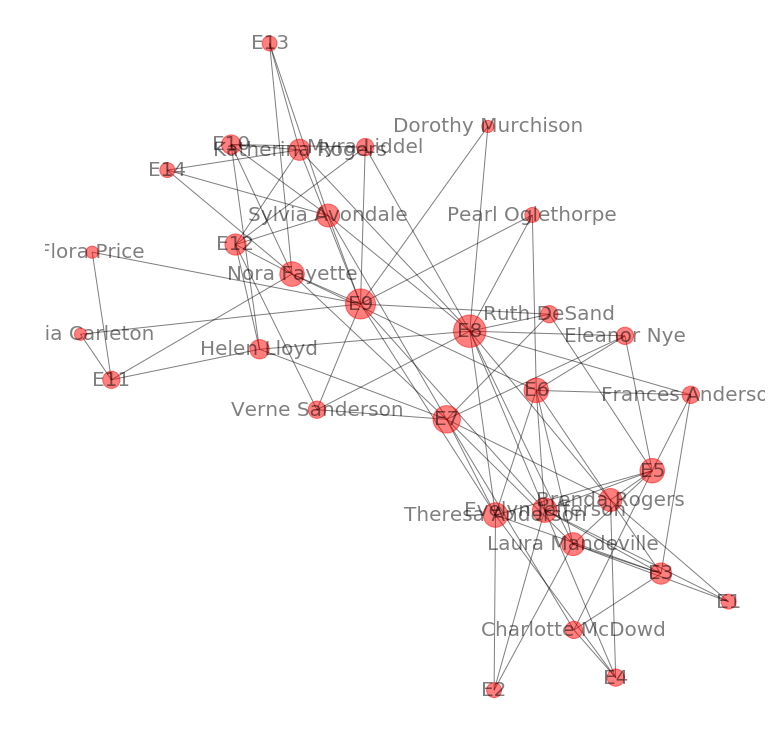

In [119]:

d = dict(G.degree())
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=[v*75 for v in d.values()], with_labels=True,node_color='red'
        , alpha=.5, font_size=20)

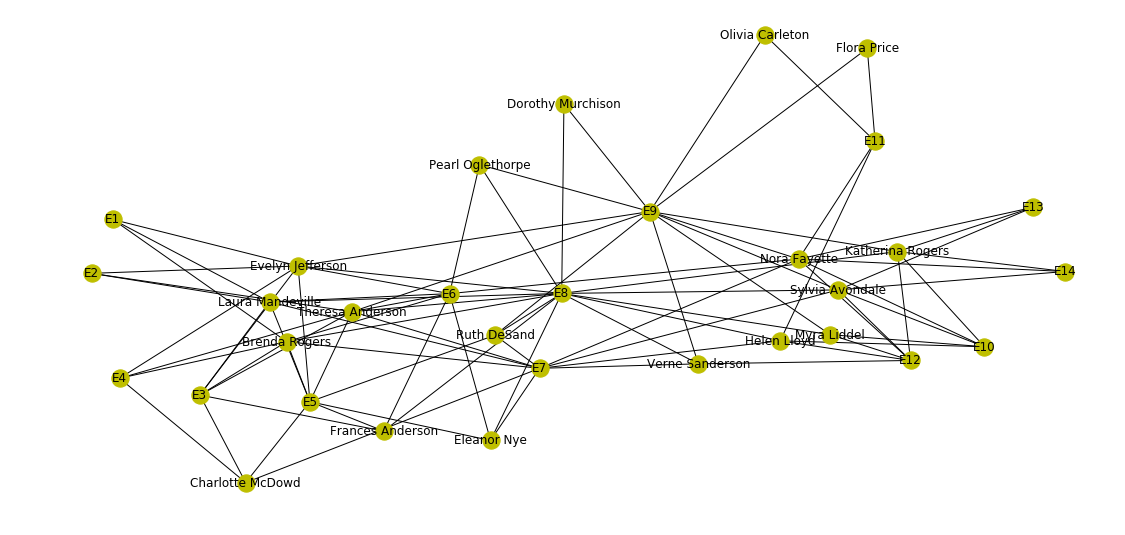

In [120]:
#Network graph  with labels
plt.figure(figsize=(15,7))
nx.draw(G, with_labels=True, node_color="y")

**Bipartite Projections**

The first Bipartite projection will be used to create a connection between the Southern Women who participate in the same club events. This information will be captured in a pandas dataframe. A second Bipartite projection will be used to create a connection between club events. This information will also be captured in a pandas dataframe.

Women Network 

In [91]:

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
pd.DataFrame(list(W.degree()),columns=["Member","#Friends"]).sort_values('#Friends', ascending=False)


,Member,#Friends
0,Evelyn Jefferson,17
8,Ruth DeSand,17
14,Helen Lloyd,17
13,Nora Fayette,17
12,Sylvia Avondale,17
9,Verne Sanderson,17
2,Theresa Anderson,17
7,Pearl Oglethorpe,16
10,Myra Liddel,16
11,Katherina Rogers,16


Based on the output above, Evelyn Jefferson shares a connection with  six other Southern women had the same number of mutual event connections. This  connection count amounts to 17.  The same can be said for Myra Liddel and Brenda Rogers. They each share connections with an number of other women based the number of mutual event connections. However, Ms. Jefferson, DeSand, Lloyd,Fayette,Avondale, Sanderson and  and Anderson seem to have the most connections. 

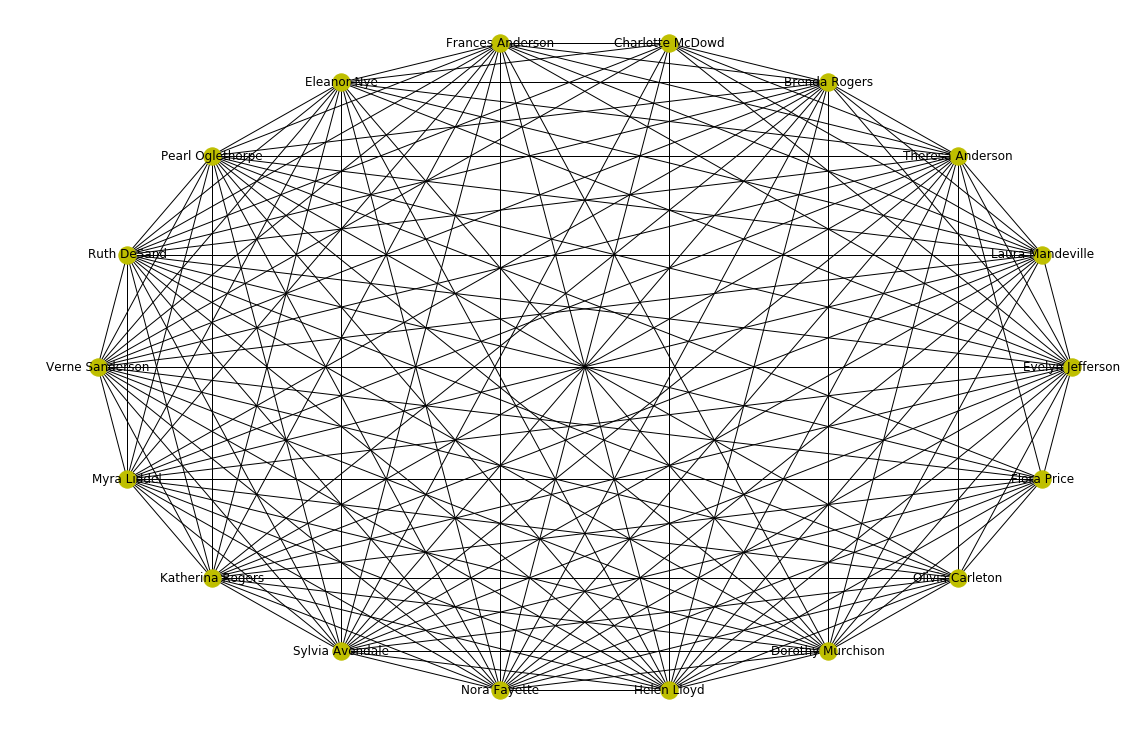

In [109]:
#Network graph of biparttite projected graph with labels
plt.figure(figsize=(15,10))
nx.draw_circular(W, with_labels=True, node_color="y")

*Weighted projected graph on women nodes*

The objective here is to keep the number of co-occurrence. The degree computed is weighted and counts the total numer of shared contacts. The  computed degree represents the number of meetings with friends, taking into consideration the connectedness of a node's neighbors. See table below.

In [104]:
W2 = bipartite.weighted_projected_graph(G, women)
pd.DataFrame(list(W2.degree(W2, weight='weight')),columns=["Member","#Meetings"]).sort_values('#Meetings', ascending=False)

,Member,#Meetings
2,Theresa Anderson,57
0,Evelyn Jefferson,50
3,Brenda Rogers,46
12,Sylvia Avondale,46
1,Laura Mandeville,45
13,Nora Fayette,43
8,Ruth DeSand,40
9,Verne Sanderson,38
11,Katherina Rogers,37
6,Eleanor Nye,36


In this case Theresa Anderson has the highest weighted degree resulting from the weighted projection. She  has made 57 connections by attending her 8 club meetings. 

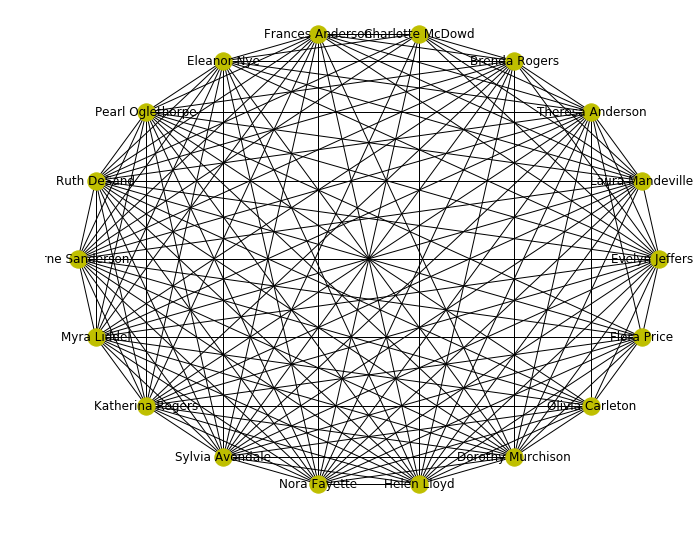

In [105]:
#Network graph  with labels
plt.figure(figsize=(9,7))
nx.draw_circular(W2, with_labels=True, node_color="y")

**Centrality Metrics of women network**

In [31]:
#from prettytable import PrettyTable
def PTable(graph):
   degree = nx.degree(graph)
   degree_centrality = nx.degree_centrality(graph)
   betweenness_centrality = nx.betweenness_centrality(graph)
   closeness_centrality = nx.closeness_centrality(graph)
   eigenvector_centrality = nx.eigenvector_centrality_numpy(graph)
   
   table = [[name,degree[name], round(degree_centrality[name],3), round(betweenness_centrality[name],3),
             round(closeness_centrality[name],3), round(eigenvector_centrality[name],3)] for name in graph.nodes()]
   table = sorted(table,key = lambda x: -x[2])
   Ptable = PrettyTable(['Subject','Degree','Degree Centrality','Betweenness','Closeness','Eigenvector'])
   
   for i in range(0, len(table)):
       Ptable.add_row(table[i])
   return Ptable

In [32]:
print((PTable(W)))

+-------------------+--------+-------------------+-------------+-----------+-------------+
|      Subject      | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+-------------------+--------+-------------------+-------------+-----------+-------------+
|  Evelyn Jefferson |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Theresa Anderson |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Ruth DeSand    |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Verne Sanderson  |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Sylvia Avondale  |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Nora Fayette   |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Helen Lloyd    |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Pearl Oglethorpe |   16   |       0.941       |    0.005    |   0.944   |    0.243    |

From all analysis above, we can infer that Ms. Jefferson and Ms. Anderson are the two most connected women. 

*Club Events*

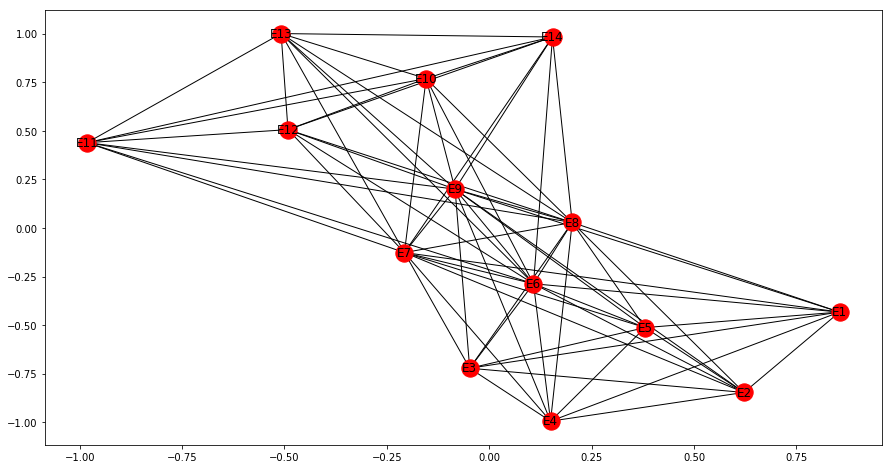

In [124]:

#Visualisation of events network and :
plt.figure(figsize=(15,8))
C = bipartite.weighted_projected_graph(G, clubs, ratio=False)
nx.draw_networkx(C, with_labels=True)

*Centrality metrics of events network*

In [34]:
print((PTable(C)))

+---------+--------+-------------------+-------------+-----------+-------------+
| Subject | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+---------+--------+-------------------+-------------+-----------+-------------+
|    E6   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E7   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E8   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E9   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E1   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E2   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E3   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E4   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E5   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|   E10   |   8    |       0

We can infer that E6, E7, E8 and E9 are events that have strong connections maybe strongly due to the connections among the women who attended these events.